# SEIR Model

In [3]:
%load_ext lab_black

# Data manipulation
import numpy as np
import pandas as pd

pd.options.display.max_columns = 100
pd.options.display.max_colwidth = 500

# Data viz
import plotly
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

sns.set(style="darkgrid", rc={"figure.figsize": (11.7, 8.27)})

# Modeling
from scipy.integrate import solve_ivp
from scipy.optimize import minimize, least_squares

# Other
import copy
from datetime import date, timedelta
import os
import random
import sys

# Custom module
module_path = os.path.abspath(os.path.join("../"))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.seir_model import SEIRModel
from src.plotting import plot_predictions
from src.utils import get_covid_data, get_all_covid_data

# Reload imported code
%reload_ext autoreload
%autoreload 2

# Print all output
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

# Set seeds for reproducibility
rand_seed = 2
np.random.seed(rand_seed)
random.seed(rand_seed)

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


## Load data

In [64]:
# Read in data
start_date = date(day=8, month=3, year=2020)
covid_data = get_all_covid_data(level="prov").query("date >= @start_date")
end_date = covid_data["date"].max()

# Filter only provinces of interest
provinces = ["Alberta", "BC", "Manitoba", "Ontario", "Quebec", "Saskatchewan"]
covid_data = covid_data.query("province in @provinces")

# Filter for Ontario
covid_ontario = covid_data.query('province == "Ontario"')

covid_ontario.head(10)

,province,date,cumulative_cases,cumulative_recovered,cumulative_deaths,active_cases,active_cases_change,deaths,recovered,cases,population,removed,cumulative_removed,susceptible,percent_susceptible
2643,Ontario,2020-03-08,32,4,0,28,4,0,0,4,14734014,0,4,14733982,0.999998
2644,Ontario,2020-03-09,35,5,0,30,2,0,1,3,14734014,1,5,14733979,0.999998
2645,Ontario,2020-03-10,37,5,0,32,2,0,0,2,14734014,0,5,14733977,0.999997
2646,Ontario,2020-03-11,42,5,1,36,4,1,0,5,14734014,1,6,14733972,0.999997
2647,Ontario,2020-03-12,59,5,1,53,17,0,0,17,14734014,0,6,14733955,0.999996
2648,Ontario,2020-03-13,79,5,1,73,20,0,0,20,14734014,0,6,14733935,0.999995
2649,Ontario,2020-03-14,103,5,1,97,24,0,0,24,14734014,0,6,14733911,0.999993
2650,Ontario,2020-03-15,145,5,1,139,42,0,0,42,14734014,0,6,14733869,0.999990
2651,Ontario,2020-03-16,177,5,1,171,32,0,0,32,14734014,0,6,14733837,0.999988
2652,Ontario,2020-03-17,189,5,1,183,12,0,0,12,14734014,0,6,14733825,0.999987


## SEIR model parameter estimation

In [65]:
%%time

model = SEIRModel(lam=0.5)
model.fit(mortality_ontario)
forecasts = model.forecast(h=21)

forecasts.tail()

Wall time: 8.29 s


,date,susceptible_pred,active_exposed_pred,active_cases_pred,cumulative_deaths_pred,province,is_forecast,cumulative_cases,cumulative_recovered,cumulative_deaths,active_cases,active_cases_change,deaths,recovered,cases,population,removed,cumulative_removed,susceptible,percent_susceptible
298,2020-12-31,1.473044e+07,1.855550,2.728036,3566.468980,Ontario,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
299,2021-01-01,1.473044e+07,1.839257,2.705795,3569.120230,Ontario,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300,2021-01-02,1.473044e+07,1.824753,2.682079,3571.749867,Ontario,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
301,2021-01-03,1.473044e+07,1.810435,2.658498,3574.357421,Ontario,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
302,2021-01-04,1.473043e+07,1.791552,2.639827,3576.941125,Ontario,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
model.optimal_params

array([1.42258299, 0.96212187, 0.97607514])

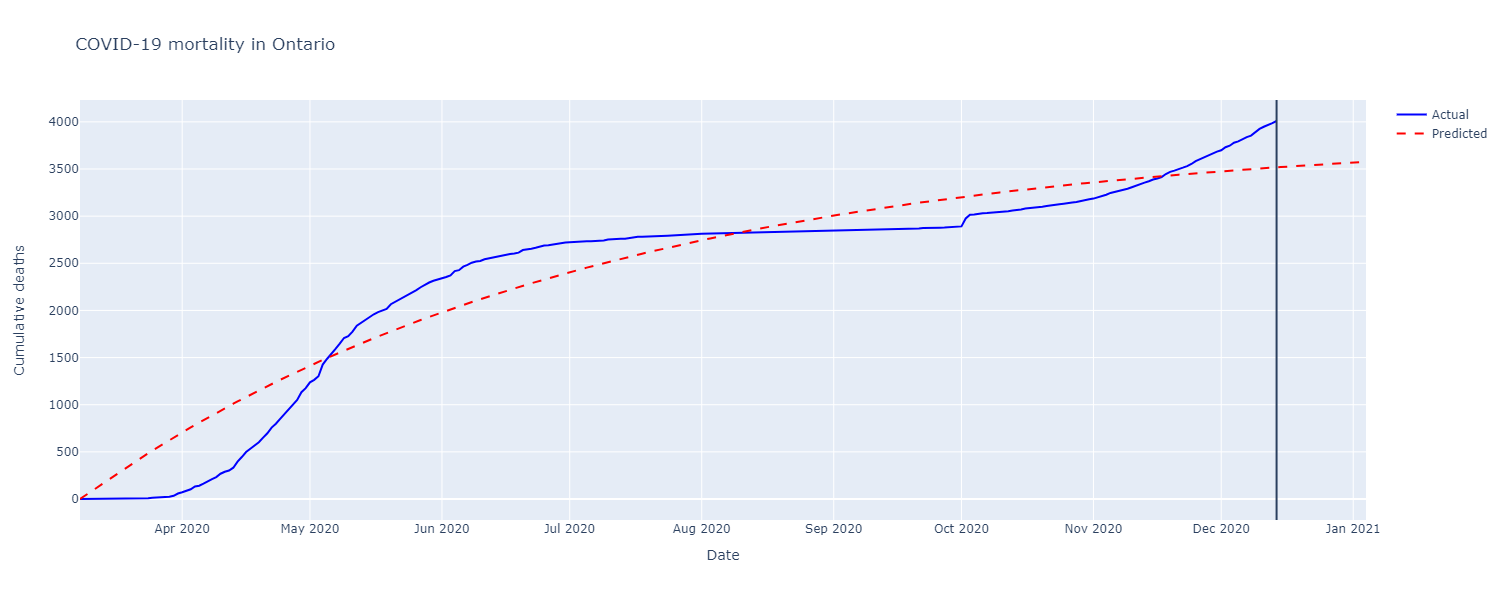

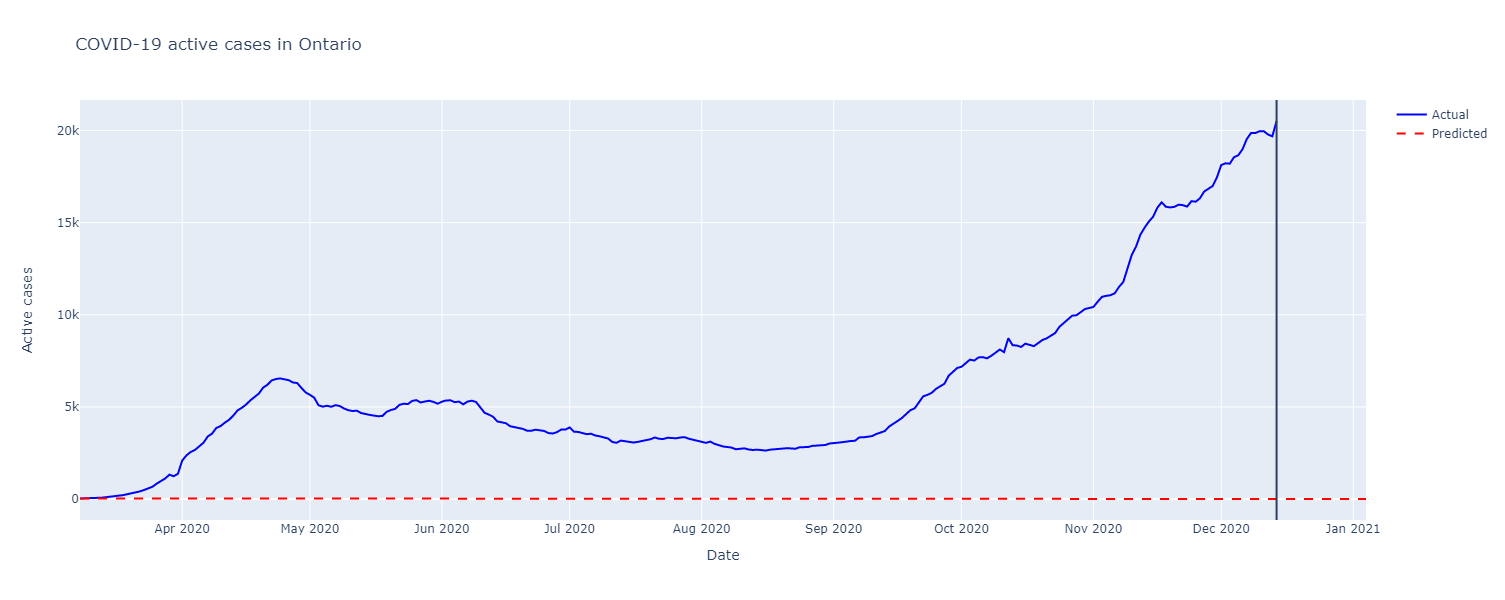

In [67]:
plot_predictions(
    forecasts,
    y="cumulative_deaths",
    y_label="Cumulative deaths",
    title="COVID-19 mortality in Ontario",
    height=600,
)

plot_predictions(
    forecasts,
    y="active_cases",
    y_label="Active cases",
    title="COVID-19 active cases in Ontario",
    height=600,
)